In [45]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

In [46]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [47]:
x_train = x_train/255.0
x_test = x_test/255.0

In [48]:
model = Sequential([
    Conv2D(32, (3, 3), activation = 'relu',
    input_shape = (32, 32, 3)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax')
])
model

In [55]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
key = model.fit(x_train, y_train, epochs = 10,
         validation_data = (x_test, y_test))


Epoch 1/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.6625 - accuracy: 0.7668 - val_loss: 1.1965 - val_accuracy: 0.6258
Epoch 2/10
1563/1563 [==============================] - 21s 14ms/step - loss: 0.6456 - accuracy: 0.7740 - val_loss: 1.1934 - val_accuracy: 0.6287
Epoch 3/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.6302 - accuracy: 0.7797 - val_loss: 1.1806 - val_accuracy: 0.6376
Epoch 4/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.6131 - accuracy: 0.7862 - val_loss: 1.2190 - val_accuracy: 0.6271
Epoch 5/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.6029 - accuracy: 0.7891 - val_loss: 1.2713 - val_accuracy: 0.6214
Epoch 6/10
1563/1563 [==============================] - 21s 14ms/step - loss: 0.5846 - accuracy: 0.7964 - val_loss: 1.3024 - val_accuracy: 0.6222
Epoch 7/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.5763 - accuracy: 0.7970 - val_loss: 1.2587 -

In [56]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.3792 - accuracy: 0.6177


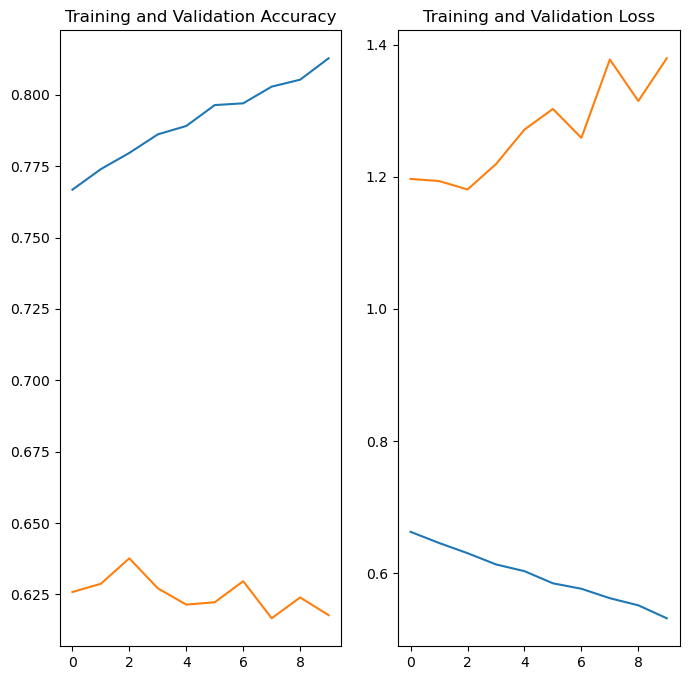

In [57]:
epochs = 10
acc = key.history['accuracy']

val_acc = key.history['val_accuracy']

loss = key.history['loss']
val_loss = key.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc)
plt.plot(epochs_range, val_acc)
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss)
plt.plot(epochs_range, val_loss)
plt.title('Training and Validation Loss')
plt.show()


In [58]:
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Test loss: 1.3791602849960327
Test accuracy: 0.6176999807357788


In [22]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [28]:
data = datasets.load_digits()
data

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [25]:
x = data.images.reshape((len(data.images),-1))
y = data.target
x, y

(array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 array([0, 1, 2, ..., 8, 9, 8]))

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [34]:
svm = SVC()

In [35]:
svm.fit(x_train, y_train)

SVC()

In [37]:
predictions = svm.predict(x_test)
predictions

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 9, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 9, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 3, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 7, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 5, 1, 4, 7, 6, 8, 8, 5,
       5, 1, 6, 2, 8, 8, 9, 5, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

In [38]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.9861111111111112

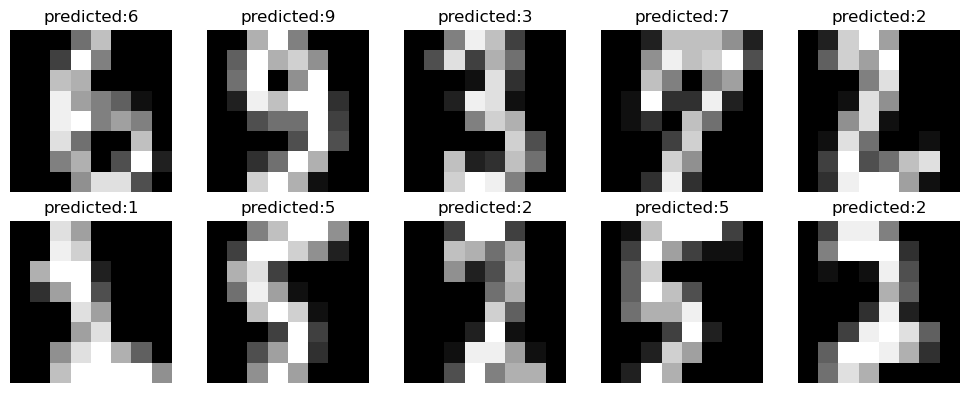

In [39]:
fig, axes = plt.subplots(nrows = 2, ncols = 5, figsize = (10,4))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_test[i].reshape(8, 8), cmap = 'gray')
    ax.set_title(f"predicted:{predictions[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()